![title](fraud_detection1.PNG)

# How to Build fraud detection model with machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

# Part I

## Read in the Compliant data

In [2]:
complianceSea = pd.read_csv('CompliantSea.csv',sep = ';',encoding='latin',decimal= ',')
complianceSea.head()

,ENTRYNO,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,ITEMNO,CPC,FRONTIER,HSCODE,DESCRIPTION,...,ENTRYSTATUS,PASSINGOFFICER,VERIFYINGOFFICER,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,F147NO,F147AMOUNT,F147AMOUNTPAID
0,2017MSA6575135,MSA,01/08/2017 11:13,02/08/2017 22:02,04/08/2017 16:44,1,C400,MSA,8001100000,REFINED TIN METAL INGOTS,...,V,5874,607,4500,4500,4500,1.255350e+07,NaN,NaN,NaN
1,2017MSA6575135,MSA,01/08/2017 11:13,02/08/2017 22:02,04/08/2017 16:44,2,C400,MSA,2510100000,CALCIUM ALLUMINIUM,...,V,5874,607,342,300,300,4.484098e+05,NaN,NaN,NaN
2,2017MSA6575135,MSA,01/08/2017 11:13,02/08/2017 22:02,04/08/2017 16:44,3,C400,MSA,2805120000,CALCIUM METAL,...,V,5874,607,360,300,300,2.482269e+05,NaN,NaN,NaN
3,2017MSA6686662,MSA,30/10/2017 09:32,31/10/2017 14:22,03/11/2017 17:22,1,C400,MSA,8507900000,PP EMPTY BATTERY CONTAINER BOXES AND ACCESSORI...,...,V,4899,5047,5991,5761,5761,2.044713e+06,NaN,NaN,NaN
4,2017MSA6686664,MSA,30/10/2017 09:33,31/10/2017 16:22,03/11/2017 17:22,1,C400,MSA,3919100000,"TOP/BODY POWERLAST,CHLORIDE EXIDE ADHESIVE BAT...",...,V,4969,5047,166,160,160,2.812577e+06,NaN,NaN,NaN


In [3]:
complianceSea.shape

(483343, 30)

### Number of items by declaration

In [4]:
# operations to performed on each column
agg = {'ITEMNO':'count','GROSSWEIGHT':'sum', 'NETWEIGHT':'sum', 'QUANTITY':'sum', 'CUSTOMSVALUE':'sum'}

# group by Entry_No and perform the above operations on each columns
Nb_Item_by_Dec = pd.pivot_table(complianceSea, index ='ENTRYNO', aggfunc=agg)

#rename the columns
Nb_Item_by_Dec.columns = ['Total_CUSTOMSVALUE','Total_GROSSWEIGHT','nb_items','Total_NETWEIGHT', 'Total_QUANTITY']

Nb_Item_by_Dec.head()

,Total_CUSTOMSVALUE,Total_GROSSWEIGHT,nb_items,Total_NETWEIGHT,Total_QUANTITY
ENTRYNO,,,,,
2017MSA6302186,1344572.730,26000,4,25500,2592
2017MSA6302191,1259081.504,8010,1,7327,8190
2017MSA6302193,1995675.653,5062,7,5062,5867
2017MSA6302195,299062.000,1010,1,1010,1
2017MSA6302196,883802.708,48096,1,48000,48000


In [5]:
Nb_Item_by_Dec.shape

(140151, 5)

In [6]:
### to remove duplicates
complianceSea1 = complianceSea.drop_duplicates(subset=['ENTRYNO'])

#extraction of the first two characters of HS
complianceSea1['HSCODE'] = complianceSea1.HSCODE.apply(lambda x : str(x)[:2])

# Detete null columns
complianceSea1.drop(['F147NO', 'F147AMOUNT', 'F147AMOUNTPAID'], axis= 1, inplace= True)
complianceSea1.head(3)

,ENTRYNO,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,ITEMNO,CPC,FRONTIER,HSCODE,DESCRIPTION,...,COUNTRYOFDESTINATION,PLACEOFDISCHARGE,CHANNEL,ENTRYSTATUS,PASSINGOFFICER,VERIFYINGOFFICER,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,2017MSA6575135,MSA,01/08/2017 11:13,02/08/2017 22:02,04/08/2017 16:44,1,C400,MSA,80,REFINED TIN METAL INGOTS,...,NaN,SIG,Y,V,5874,607,4500,4500,4500,1.255350e+07
3,2017MSA6686662,MSA,30/10/2017 09:32,31/10/2017 14:22,03/11/2017 17:22,1,C400,MSA,85,PP EMPTY BATTERY CONTAINER BOXES AND ACCESSORI...,...,NaN,MCD,G,V,4899,5047,5991,5761,5761,2.044713e+06
4,2017MSA6686664,MSA,30/10/2017 09:33,31/10/2017 16:22,03/11/2017 17:22,1,C400,MSA,39,"TOP/BODY POWERLAST,CHLORIDE EXIDE ADHESIVE BAT...",...,NaN,MCD,G,V,4969,5047,166,160,160,2.812577e+06


In [7]:
complianceSea1.shape

(140151, 27)

In [8]:
# Merge tables
complianceSea2 = pd.merge(Nb_Item_by_Dec, complianceSea1, on = 'ENTRYNO')
complianceSea2.head(3)

,ENTRYNO,Total_CUSTOMSVALUE,Total_GROSSWEIGHT,nb_items,Total_NETWEIGHT,Total_QUANTITY,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,...,COUNTRYOFDESTINATION,PLACEOFDISCHARGE,CHANNEL,ENTRYSTATUS,PASSINGOFFICER,VERIFYINGOFFICER,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,2017MSA6302186,1344572.730,26000,4,25500,2592,MSA,01/01/2017 09:15,03/01/2017 18:23,04/01/2017 04:48,...,NaN,BFT,R,V,1151,4812,10833,10625,1112,554475.239
1,2017MSA6302191,1259081.504,8010,1,7327,8190,MSA,02/01/2017 11:45,11/01/2017 17:41,16/01/2017 02:35,...,NaN,MCT,G,V,4568,5646,8010,7327,8190,1259081.504
2,2017MSA6302193,1995675.653,5062,7,5062,5867,MSA,02/01/2017 12:31,04/01/2017 12:11,06/01/2017 16:00,...,NaN,FOC,G,V,5861,6027,71,71,71,79287.913


In [9]:
complianceSea2.shape

(140151, 32)

In [10]:
# retrieve columns that interest us in our model
colns = ['ENTRYNO','REGISTRATIONDATE','DATEPASSED','HSCODE', 'nb_items',
        'Total_GROSSWEIGHT', 'Total_NETWEIGHT','Total_QUANTITY', 'Total_CUSTOMSVALUE']
CompliantSea3 = complianceSea2[colns]
CompliantSea3.head()

,ENTRYNO,REGISTRATIONDATE,DATEPASSED,HSCODE,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_QUANTITY,Total_CUSTOMSVALUE
0,2017MSA6302186,01/01/2017 09:15,03/01/2017 18:23,70,4,26000,25500,2592,1344572.730
1,2017MSA6302191,02/01/2017 11:45,11/01/2017 17:41,27,1,8010,7327,8190,1259081.504
2,2017MSA6302193,02/01/2017 12:31,04/01/2017 12:11,73,7,5062,5062,5867,1995675.653
3,2017MSA6302195,02/01/2017 12:42,03/01/2017 12:34,87,1,1010,1010,1,299062.000
4,2017MSA6302196,02/01/2017 13:00,05/01/2017 22:14,31,1,48096,48000,48000,883802.708


In [11]:
# datetime conversion
CompliantSea3['REGISTRATIONDATE'] = pd.to_datetime(CompliantSea3.REGISTRATIONDATE, dayfirst = True)
CompliantSea3['DATEPASSED'] = pd.to_datetime(CompliantSea3.DATEPASSED, dayfirst = True)

# day difference
CompliantSea3['DurationRegToPas'] = CompliantSea3.DATEPASSED.dt.day - CompliantSea3.REGISTRATIONDATE.dt.day

# month in Registration
CompliantSea3['MonthRegistration'] = CompliantSea3.REGISTRATIONDATE.dt.month

# week days for registration
CompliantSea3['DayRegistration'] = CompliantSea3.REGISTRATIONDATE.dt.weekday+1

# add new variable 
CompliantSea3['Target'] = 1

# view top 5
CompliantSea3.head()

,ENTRYNO,REGISTRATIONDATE,DATEPASSED,HSCODE,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_QUANTITY,Total_CUSTOMSVALUE,DurationRegToPas,MonthRegistration,DayRegistration,Target
0,2017MSA6302186,2017-01-01 09:15:00,2017-01-03 18:23:00,70,4,26000,25500,2592,1344572.730,2,1,7,1
1,2017MSA6302191,2017-01-02 11:45:00,2017-01-11 17:41:00,27,1,8010,7327,8190,1259081.504,9,1,1,1
2,2017MSA6302193,2017-01-02 12:31:00,2017-01-04 12:11:00,73,7,5062,5062,5867,1995675.653,2,1,1,1
3,2017MSA6302195,2017-01-02 12:42:00,2017-01-03 12:34:00,87,1,1010,1010,1,299062.000,1,1,1,1
4,2017MSA6302196,2017-01-02 13:00:00,2017-01-05 22:14:00,31,1,48096,48000,48000,883802.708,3,1,1,1


In [12]:
CompliantSea3.shape

(140151, 13)

### Export CompliantSea3 to csv file

In [13]:
CompliantSea3.to_csv('CompliantSea3.csv',sep = ';')

# Part II

## Read in NCompliantSea data

In [14]:
NcomplianceSea = pd.read_csv('NCompliantSea.csv',sep = ';',encoding='latin',decimal= ',')
NcomplianceSea.head()

,ENTRYNO,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,FRONTIER,CONSIGNEEPIN,CONSIGNEENAME,CONSIGNORPIN,CONSIGNORNAME,...,NETWEIGHT,QUANTITY,CUSTOMSVALUE,AMOUNTPAID,F147NO,F147ITEMNO,TAXCODE,TAXDESC,F147TAXAMOUNT,F147PAIDAMOUNT
0,2017MSA6577737,MSA,02/08/2017 15:51,19/08/2017 13:37,19/08/2017 02:25,NaN,P051606785W,IGSAR GROUP KENYA LIMITED,NaN,"KAMPHAENGPHET EXPORT CO., LTD AC APEX CO",...,234000,234000,1.075744e+07,5157432.0,2017MSA1156596,1,110,Import Duty - Oil,123322.0,134296
1,2017MSA6699782,MSA,07/11/2017 11:15,07/11/2017 13:14,08/11/2017 05:16,KLD,A006586526E,SAMUEL GAMBO MUYE,NaN,BOYUAN GROUP HOLDINGS CO LIMITED,...,14800,1382,4.890853e+05,803685.0,2017MSA1193737,1,110,Import Duty - Oil,116887.0,227387
2,2017MSA6699782,MSA,07/11/2017 11:15,07/11/2017 13:14,08/11/2017 05:16,KLD,A006586526E,SAMUEL GAMBO MUYE,NaN,BOYUAN GROUP HOLDINGS CO LIMITED,...,1300,1300,1.161955e+06,803685.0,2017MSA1193737,1,110,Import Duty - Oil,116887.0,227387
3,2017MSA6346427,MSA,06/02/2017 13:43,13/02/2017 17:45,16/02/2017 11:20,KLD,P051316595P,ASPAM ENERGY KENYA LIMITED,NaN,SURYA ENERGY FZC,...,599940,599940,1.905260e+07,6185032.0,2017MSA1087294,2,110,Import Duty - Oil EXTRA,592252.0,1841903
4,2017MSA6720903,MSA,22/11/2017 14:08,23/11/2017 17:20,30/11/2017 03:51,KLD,P051316595P,ASPAM ENERGY KENYA LIMITED,NaN,INDO SWISS OIL FZC,...,302300,302300,1.004757e+07,3255630.0,2017MSA1204967,1,120,C4,195747.0,621082


In [15]:
NcomplianceSea.shape

(270688, 34)

### Number of items by declaration

In [16]:
# operations to performed on each column
agg = {'ITEMNO':'count','GROSSWEIGHT':'sum', 'NETWEIGHT':'sum', 'QUANTITY':'sum', 'CUSTOMSVALUE':'sum'}

# group by Entry_No and perform the above operations on each columns
Nb_Item_by_Dec2 = pd.pivot_table(NcomplianceSea, index ='ENTRYNO', aggfunc=agg)

#rename the columns
Nb_Item_by_Dec2.columns = ['Total_CUSTOMSVALUE','Total_GROSSWEIGHT','nb_items','Total_NETWEIGHT', 'Total_QUANTITY']

Nb_Item_by_Dec2.head()

,Total_CUSTOMSVALUE,Total_GROSSWEIGHT,nb_items,Total_NETWEIGHT,Total_QUANTITY
ENTRYNO,,,,,
2017MSA6302209,2.283720e+05,1000,1,1000,1
2017MSA6302242,2.031940e+05,990,1,990,1
2017MSA6302255,2.031940e+05,990,1,990,1
2017MSA6302287,2.031940e+05,990,1,990,1
2017MSA6302288,2.789908e+07,1008800,8,958120,958120


In [17]:
Nb_Item_by_Dec2.shape

(18271, 5)

In [18]:
### to remove duplicates
NcomplianceSea1 = NcomplianceSea.drop_duplicates(subset=['ENTRYNO'])

#extraction of the first two characters of HS
NcomplianceSea1['HSCODE'] = NcomplianceSea1.HSCODE.apply(lambda x : str(x)[:2])

# Merge tables
NcomplianceSea2 = pd.merge(Nb_Item_by_Dec2, NcomplianceSea1, on = 'ENTRYNO')

# back fill missing values in 
NcomplianceSea2['DATEPASSED'] = NcomplianceSea2.DATEPASSED.bfill()
NcomplianceSea2.head(3)


,ENTRYNO,Total_CUSTOMSVALUE,Total_GROSSWEIGHT,nb_items,Total_NETWEIGHT,Total_QUANTITY,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,...,NETWEIGHT,QUANTITY,CUSTOMSVALUE,AMOUNTPAID,F147NO,F147ITEMNO,TAXCODE,TAXDESC,F147TAXAMOUNT,F147PAIDAMOUNT
0,2017MSA6302209,228372.0,1000,1,1000,1,MSA,02/01/2017 18:05,04/01/2017 18:25,05/01/2017 03:52,...,1000,1,228372.0,184476.0,2017MSA1074177,2,710,IDF Fees (2%),433.0,1543
1,2017MSA6302242,203194.0,990,1,990,1,MSA,03/01/2017 08:30,03/01/2017 17:38,06/01/2017 12:35,...,990,1,203194.0,164964.0,2017MSA1073982,2,710,IDF Fees (2%),936.0,2160
2,2017MSA6302255,203194.0,990,1,990,1,MSA,03/01/2017 08:58,03/01/2017 16:32,06/01/2017 01:15,...,990,1,203194.0,164964.0,2017MSA1073981,2,710,IDF Fees (2%),936.0,2160


In [19]:
NcomplianceSea2.shape

(18271, 39)

In [20]:
# retrieve columns that interest us in our model
colns = ['ENTRYNO','REGISTRATIONDATE','DATEPASSED','HSCODE', 'nb_items',
        'Total_GROSSWEIGHT', 'Total_NETWEIGHT','Total_QUANTITY', 'Total_CUSTOMSVALUE']

NCompliantSea3 = NcomplianceSea2[colns]
NCompliantSea3.head(3)

,ENTRYNO,REGISTRATIONDATE,DATEPASSED,HSCODE,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_QUANTITY,Total_CUSTOMSVALUE
0,2017MSA6302209,02/01/2017 18:05,04/01/2017 18:25,87,1,1000,1000,1,228372.0
1,2017MSA6302242,03/01/2017 08:30,03/01/2017 17:38,87,1,990,990,1,203194.0
2,2017MSA6302255,03/01/2017 08:58,03/01/2017 16:32,87,1,990,990,1,203194.0


In [21]:
# datetime conversion
NCompliantSea3['REGISTRATIONDATE'] = pd.to_datetime(NCompliantSea3.REGISTRATIONDATE, dayfirst = True)
NCompliantSea3['DATEPASSED'] = pd.to_datetime(NCompliantSea3.DATEPASSED, dayfirst = True)

# day difference
NCompliantSea3['DurationRegToPas'] = NCompliantSea3.DATEPASSED.dt.day - NCompliantSea3.REGISTRATIONDATE.dt.day

# month in Registration
NCompliantSea3['MonthRegistration'] = NCompliantSea3.REGISTRATIONDATE.dt.month

# week days for registration
NCompliantSea3['DayRegistration'] = NCompliantSea3.REGISTRATIONDATE.dt.weekday+1

# add new variables 
NCompliantSea3['Target'] = 0

# view top 5
NCompliantSea3.head()

,ENTRYNO,REGISTRATIONDATE,DATEPASSED,HSCODE,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_QUANTITY,Total_CUSTOMSVALUE,DurationRegToPas,MonthRegistration,DayRegistration,Target
0,2017MSA6302209,2017-01-02 18:05:00,2017-01-04 18:25:00,87,1,1000,1000,1,2.283720e+05,2,1,1,0
1,2017MSA6302242,2017-01-03 08:30:00,2017-01-03 17:38:00,87,1,990,990,1,2.031940e+05,0,1,2,0
2,2017MSA6302255,2017-01-03 08:58:00,2017-01-03 16:32:00,87,1,990,990,1,2.031940e+05,0,1,2,0
3,2017MSA6302287,2017-01-03 09:24:00,2017-01-03 20:42:00,87,1,990,990,1,2.031940e+05,0,1,2,0
4,2017MSA6302288,2017-01-03 09:24:00,2017-01-06 17:56:00,27,8,1008800,958120,958120,2.789908e+07,3,1,2,0


In [22]:
NCompliantSea3.shape

(18271, 13)

### Export NCompliantSea3 to csv file

In [23]:
NCompliantSea3.to_csv('NCompliantSea3.csv',sep = ';')

## Merge dataframes (CompliantSea3, NCompliantSea3)

In [24]:
# merge dataframes
CompliantSea4 = pd.merge(CompliantSea3, NCompliantSea3, left_on=list(CompliantSea3.columns), 
              right_on=list(NCompliantSea3.columns),how = 'outer')

#sort values by 
CompliantSea4 = CompliantSea4.sort_values(by = 'ENTRYNO' )
CompliantSea4.head()

,ENTRYNO,REGISTRATIONDATE,DATEPASSED,HSCODE,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_QUANTITY,Total_CUSTOMSVALUE,DurationRegToPas,MonthRegistration,DayRegistration,Target
0,2017MSA6302186,2017-01-01 09:15:00,2017-01-03 18:23:00,70,4,26000,25500,2592,1344572.730,2,1,7,1
1,2017MSA6302191,2017-01-02 11:45:00,2017-01-11 17:41:00,27,1,8010,7327,8190,1259081.504,9,1,1,1
2,2017MSA6302193,2017-01-02 12:31:00,2017-01-04 12:11:00,73,7,5062,5062,5867,1995675.653,2,1,1,1
3,2017MSA6302195,2017-01-02 12:42:00,2017-01-03 12:34:00,87,1,1010,1010,1,299062.000,1,1,1,1
4,2017MSA6302196,2017-01-02 13:00:00,2017-01-05 22:14:00,31,1,48096,48000,48000,883802.708,3,1,1,1


In [25]:
CompliantSea4.shape

(158422, 13)

### Checking if the Target variable is balance

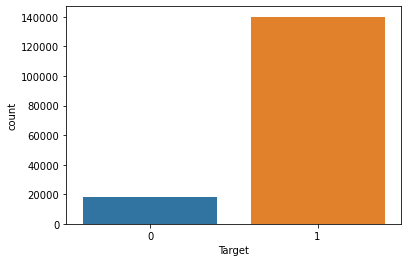

In [26]:
sn.countplot(CompliantSea4.Target)
plt.show()

## Export CompliantSea4 to csv

In [27]:
CompliantSea4.to_csv('Base_data.csv',sep = ';')

# Part III

## Build Machine Learning Models

### Machine Learning Libraries

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import Normalizer,StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_curve,roc_auc_score

# Working data 1
### Select subset (features) of the base data

In [28]:
relevant_selection = ['nb_items','Total_GROSSWEIGHT','Total_NETWEIGHT','Total_QUANTITY','Total_CUSTOMSVALUE',
                        'MonthRegistration','DayRegistration', 'Target']

New_dataset1 = CompliantSea4.copy()[relevant_selection]
New_dataset1.head()

,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_QUANTITY,Total_CUSTOMSVALUE,MonthRegistration,DayRegistration,Target
0,4,26000,25500,2592,1344572.730,1,7,1
1,1,8010,7327,8190,1259081.504,1,1,1
2,7,5062,5062,5867,1995675.653,1,1,1
3,1,1010,1010,1,299062.000,1,1,1
4,1,48096,48000,48000,883802.708,1,1,1


In [29]:
New_dataset1.shape

(158422, 8)

### Train-Test split

In [30]:
X = New_dataset1.copy()
y = X.pop('Target')

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, stratify  = y,random_state = 6)

### Logistic regression 1

In [31]:
LModel = LogisticRegression()
LModel.fit(X_train,y_train) 

pred1 = LModel.predict(X_test)
pd.crosstab(y_test,pred1)

col_0,0,1
Target,,
0,75,3579
1,365,27666


In [32]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.17      0.02      0.04      3654
           1       0.89      0.99      0.93     28031

    accuracy                           0.88     31685
   macro avg       0.53      0.50      0.49     31685
weighted avg       0.80      0.88      0.83     31685



### Decision Tree 1

In [33]:
D_tree1 = DecisionTreeClassifier()
D_tree1.fit(X_train,y_train)

D_tree_pred = D_tree1.predict(X_test)
pd.crosstab(y_test,D_tree_pred)


col_0,0,1
Target,,
0,2424,1230
1,1428,26603


In [34]:
print(classification_report(y_test,D_tree_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      3654
           1       0.96      0.95      0.95     28031

    accuracy                           0.92     31685
   macro avg       0.79      0.81      0.80     31685
weighted avg       0.92      0.92      0.92     31685



### KNN 1

In [35]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)
pd.crosstab(y_test,pred_knn)


col_0,0,1
Target,,
0,2025,1629
1,3463,24568


In [36]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.37      0.55      0.44      3654
           1       0.94      0.88      0.91     28031

    accuracy                           0.84     31685
   macro avg       0.65      0.72      0.67     31685
weighted avg       0.87      0.84      0.85     31685



### Random Forest 1

In [37]:
RFmodel = RandomForestClassifier(n_estimators=150)
RFmodel.fit(X_train,y_train)

pred_RF = RFmodel.predict(X_test)
pd.crosstab(y_test,pred_RF)


col_0,0,1
Target,,
0,2420,1234
1,423,27608


In [38]:
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74      3654
           1       0.96      0.98      0.97     28031

    accuracy                           0.95     31685
   macro avg       0.90      0.82      0.86     31685
weighted avg       0.94      0.95      0.94     31685



### AdaBoost 1

In [39]:
AdbB_model = AdaBoostClassifier()
AdbB_model.fit(X_train,y_train)

pred_AdbB = AdbB_model.predict(X_test)
pd.crosstab(y_test,pred_AdbB)

col_0,0,1
Target,,
0,993,2661
1,358,27673


In [40]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.37      0.55      0.44      3654
           1       0.94      0.88      0.91     28031

    accuracy                           0.84     31685
   macro avg       0.65      0.72      0.67     31685
weighted avg       0.87      0.84      0.85     31685



# Working data 2
### Try another subset (features) of the base data

In [41]:
six_columns = ['nb_items', 'Total_GROSSWEIGHT', 'Total_NETWEIGHT',
                'Total_CUSTOMSVALUE','MonthRegistration','Target']

New_dataset2 = CompliantSea4[six_columns]
New_dataset2.head()

,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_CUSTOMSVALUE,MonthRegistration,Target
0,4,26000,25500,1344572.730,1,1
1,1,8010,7327,1259081.504,1,1
2,7,5062,5062,1995675.653,1,1
3,1,1010,1010,299062.000,1,1
4,1,48096,48000,883802.708,1,1


In [42]:
New_dataset2.shape

(158422, 6)

### Train_test split 2

In [43]:
X2 = New_dataset2.copy()
y2 = X2.pop('Target')

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,train_size = 0.8, stratify  = y,random_state = 6)

### Logistic regression 2

In [44]:
LModel2 = LogisticRegression()
LModel2.fit(X_train2,y_train2)

pred2 = LModel2.predict(X_test2)
pd.crosstab(y_test2,pred2)

col_0,0,1
Target,,
0,12,3642
1,47,27984


In [45]:
print(classification_report(y_test2,pred2))

              precision    recall  f1-score   support

           0       0.20      0.00      0.01      3654
           1       0.88      1.00      0.94     28031

    accuracy                           0.88     31685
   macro avg       0.54      0.50      0.47     31685
weighted avg       0.81      0.88      0.83     31685



### Decision Tree 2


In [46]:
D_tree2 = DecisionTreeClassifier()
D_tree2.fit(X_train2,y_train2)

pred_D_tree2 = D_tree2.predict(X_test2)
pd.crosstab(y_test2,pred_D_tree2)


col_0,0,1
Target,,
0,2313,1341
1,1544,26487


In [47]:
print(classification_report(y_test2,pred_D_tree2))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      3654
           1       0.95      0.94      0.95     28031

    accuracy                           0.91     31685
   macro avg       0.78      0.79      0.78     31685
weighted avg       0.91      0.91      0.91     31685



### KNN 2

In [48]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train2,y_train2)

pred_knn2 = knn2.predict(X_test2)
pd.crosstab(y_test2,pred_knn2)

col_0,0,1
Target,,
0,1930,1724
1,3788,24243


In [49]:
print(classification_report(y_test2,pred_knn2))

              precision    recall  f1-score   support

           0       0.34      0.53      0.41      3654
           1       0.93      0.86      0.90     28031

    accuracy                           0.83     31685
   macro avg       0.64      0.70      0.65     31685
weighted avg       0.86      0.83      0.84     31685



### Random Forest 2

In [50]:
RFmodel2 = RandomForestClassifier(n_estimators=150)
RFmodel2.fit(X_train2,y_train2)

pred_RF2 = RFmodel2.predict(X_test2)
pd.crosstab(y_test2,pred_RF2)

col_0,0,1
Target,,
0,2281,1373
1,533,27498


In [51]:
print(classification_report(y_test2,pred_RF2))

              precision    recall  f1-score   support

           0       0.81      0.62      0.71      3654
           1       0.95      0.98      0.97     28031

    accuracy                           0.94     31685
   macro avg       0.88      0.80      0.84     31685
weighted avg       0.94      0.94      0.94     31685



### AdaBoost 2

In [52]:
AdbB_model2 = AdaBoostClassifier()
AdbB_model2.fit(X_train2,y_train2)

pred_AdbB2 = AdbB_model2.predict(X_test2)
pd.crosstab(y_test2,pred_AdbB2)

col_0,0,1
Target,,
0,881,2773
1,346,27685


In [53]:
print(classification_report(y_test2,pred_AdbB2))

              precision    recall  f1-score   support

           0       0.72      0.24      0.36      3654
           1       0.91      0.99      0.95     28031

    accuracy                           0.90     31685
   macro avg       0.81      0.61      0.65     31685
weighted avg       0.89      0.90      0.88     31685



## Working data 3
### Try another combination of features

In [54]:
New_dataset3 = CompliantSea4[['HSCODE', 'nb_items', 'Total_GROSSWEIGHT', 'Total_NETWEIGHT',
                               'Total_QUANTITY', 'Total_CUSTOMSVALUE', 'DurationRegToPas',
                               'MonthRegistration', 'DayRegistration', 'Target']]

New_dataset3.head()

,HSCODE,nb_items,Total_GROSSWEIGHT,Total_NETWEIGHT,Total_QUANTITY,Total_CUSTOMSVALUE,DurationRegToPas,MonthRegistration,DayRegistration,Target
0,70,4,26000,25500,2592,1344572.730,2,1,7,1
1,27,1,8010,7327,8190,1259081.504,9,1,1,1
2,73,7,5062,5062,5867,1995675.653,2,1,1,1
3,87,1,1010,1010,1,299062.000,1,1,1,1
4,31,1,48096,48000,48000,883802.708,3,1,1,1


### Train-test split 3

In [55]:
X3 = New_dataset3.copy()
y3 = X3.pop('Target')

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size = 0.8, stratify  = y3, random_state = 6)


### Logistic regression 3

In [56]:
LModel3 = LogisticRegression()
LModel3.fit(X_train3,y_train3)

pred3 = LModel3.predict(X_test3)
pd.crosstab(y_test3,pred3)

col_0,0,1
Target,,
0,75,3579
1,365,27666


In [57]:
print(classification_report(y_test3,pred3))

              precision    recall  f1-score   support

           0       0.17      0.02      0.04      3654
           1       0.89      0.99      0.93     28031

    accuracy                           0.88     31685
   macro avg       0.53      0.50      0.49     31685
weighted avg       0.80      0.88      0.83     31685



### Decision Tree 3

In [58]:
D_tree3 = DecisionTreeClassifier()
D_tree3.fit(X_train3,y_train3)

pred_D_tree3 = D_tree3.predict(X_test3)
pd.crosstab(y_test3,pred_D_tree3)

col_0,0,1
Target,,
0,2629,1025
1,1185,26846


In [59]:
print(classification_report(y_test3,pred_D_tree3))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      3654
           1       0.96      0.96      0.96     28031

    accuracy                           0.93     31685
   macro avg       0.83      0.84      0.83     31685
weighted avg       0.93      0.93      0.93     31685



### KNN 3

In [60]:
knn3 = KNeighborsClassifier(n_neighbors=2)
knn3.fit(X_train3,y_train3)

pred_knn3 = knn3.predict(X_test3)
pd.crosstab(y_test3,pred_knn3)


col_0,0,1
Target,,
0,2040,1614
1,3423,24608


In [61]:
print(classification_report(y_test3,pred_knn3))

              precision    recall  f1-score   support

           0       0.37      0.56      0.45      3654
           1       0.94      0.88      0.91     28031

    accuracy                           0.84     31685
   macro avg       0.66      0.72      0.68     31685
weighted avg       0.87      0.84      0.85     31685



### Random Forest 3

In [62]:
RFmodel3 = RandomForestClassifier(n_estimators=150)
RFmodel3.fit(X_train3,y_train3)

pred_RF3 = RFmodel3.predict(X_test3)
pd.crosstab(y_test3,pred_RF3)

col_0,0,1
Target,,
0,2628,1026
1,324,27707


In [63]:
print(classification_report(y_test3,pred_RF3))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      3654
           1       0.96      0.99      0.98     28031

    accuracy                           0.96     31685
   macro avg       0.93      0.85      0.89     31685
weighted avg       0.96      0.96      0.96     31685



### AdaBoost 3

In [64]:
AdbB_model3 = AdaBoostClassifier()
AdbB_model3.fit(X_train3,y_train3)

pred_AdbB3 = AdbB_model3.predict(X_test3)
pd.crosstab(y_test3,pred_AdbB3)

col_0,0,1
Target,,
0,1366,2288
1,358,27673


In [65]:
print(classification_report(y_test3,pred_knn3))

              precision    recall  f1-score   support

           0       0.37      0.56      0.45      3654
           1       0.94      0.88      0.91     28031

    accuracy                           0.84     31685
   macro avg       0.66      0.72      0.68     31685
weighted avg       0.87      0.84      0.85     31685



# Balance the dataset (Random Oversampling)

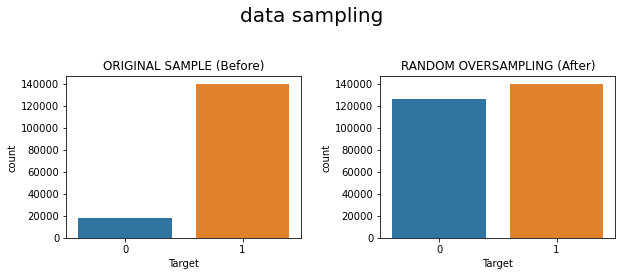

In [66]:
X3 = New_dataset3.copy()
y3 = X3.pop('Target')


# Instantiate RandomOverSampler
random_sampler = RandomOverSampler(sampling_strategy = 0.90)

# Fitting
random_x, random_y = random_sampler.fit_sample(X3,y3)

fig,axes = plt.subplots(1,2,figsize = (9,4))
fig.suptitle('data sampling', fontsize = 20)

sn.countplot(y3,ax=axes[0])
sn.countplot(random_y,ax=axes[1])

axes[0].title.set_text('ORIGINAL SAMPLE (Before)')
axes[1].title.set_text('RANDOM OVERSAMPLING (After)')

fig.tight_layout(pad = 2)

##  Train-test split (random oversampling)

In [67]:
#split
X_train_R, X_test_R, y_train_R, y_test_R =\
train_test_split(random_x, random_y, train_size = 0.8, stratify  = random_y,random_state = 6)

### Logistic Regression (random oversampling)

In [68]:
LModel = LogisticRegression()
LModel.fit(X_train_R,y_train_R)

pred_R = LModel.predict(X_test_R)
pd.crosstab(y_test_R,pred_R)

col_0,0,1
Target,,
0,23746,1481
1,24815,3216


In [69]:
print(classification_report(y_test_R,pred_R))

              precision    recall  f1-score   support

           0       0.49      0.94      0.64     25227
           1       0.68      0.11      0.20     28031

    accuracy                           0.51     53258
   macro avg       0.59      0.53      0.42     53258
weighted avg       0.59      0.51      0.41     53258



### Decision Trees (random oversampling)

In [70]:
D_tree = DecisionTreeClassifier()
D_tree.fit(X_train_R,y_train_R)

pred_D_tree_R = D_tree.predict(X_test_R)
pd.crosstab(y_test_R, pred_D_tree_R)

col_0,0,1
Target,,
0,25202,25
1,1302,26729


In [71]:
print(classification_report(y_test_R,pred_D_tree_R))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25227
           1       1.00      0.95      0.98     28031

    accuracy                           0.98     53258
   macro avg       0.97      0.98      0.98     53258
weighted avg       0.98      0.98      0.98     53258



### KNN (random oversampling)

In [72]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_R,y_train_R)

pred_knn_R = knn.predict(X_test_R)
pd.crosstab(y_test_R,pred_knn_R)

col_0,0,1
Target,,
0,24959,268
1,3946,24085


In [73]:
print(classification_report(y_test_R,pred_knn_R))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     25227
           1       0.99      0.86      0.92     28031

    accuracy                           0.92     53258
   macro avg       0.93      0.92      0.92     53258
weighted avg       0.93      0.92      0.92     53258



### Random Forest (random oversampling)

In [74]:
RFmodel = RandomForestClassifier( n_estimators=150)
RFmodel.fit(X_train_R,y_train_R)

pred_RF_R = RFmodel.predict(X_test_R)
pd.crosstab(y_test_R,pred_RF_R)

col_0,0,1
Target,,
0,25205,22
1,539,27492


In [75]:
print(classification_report(y_test_R,pred_RF_R))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25227
           1       1.00      0.98      0.99     28031

    accuracy                           0.99     53258
   macro avg       0.99      0.99      0.99     53258
weighted avg       0.99      0.99      0.99     53258



### AdaBoost (random oversampling)

In [76]:
AdbB_model = AdaBoostClassifier()
AdbB_model.fit(X_train_R,y_train_R)

pred_AdbB_R = AdbB_model.predict(X_test_R)
pd.crosstab(y_test_R,pred_AdbB_R)

col_0,0,1
Target,,
0,20193,5034
1,3829,24202


In [77]:
print(classification_report(y_test_R,pred_AdbB_R))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     25227
           1       0.83      0.86      0.85     28031

    accuracy                           0.83     53258
   macro avg       0.83      0.83      0.83     53258
weighted avg       0.83      0.83      0.83     53258



# Scaled random oversampling data

In [78]:
# Scaled
scaler = StandardScaler()
scale_random_x = scaler.fit_transform(random_x)

### Train-test split  (scaled random oversampling data)

In [79]:
#split
X_train_R_sc, X_test_R_sc, y_train_R_sc, y_test_R_sc =\
train_test_split(scale_random_x, random_y, train_size = 0.8, stratify  = random_y,random_state = 6)

### Logistic Regression (scaled random oversampling)

In [80]:
LModel = LogisticRegression()
LModel.fit(X_train_R_sc,y_train_R_sc)

pred_scale = LModel.predict(X_test_R_sc)
pd.crosstab(y_test_R_sc,pred_scale)

col_0,0,1
Target,,
0,8930,16297
1,3461,24570


In [81]:
print(classification_report(y_test_R_sc,pred_scale))

              precision    recall  f1-score   support

           0       0.72      0.35      0.47     25227
           1       0.60      0.88      0.71     28031

    accuracy                           0.63     53258
   macro avg       0.66      0.62      0.59     53258
weighted avg       0.66      0.63      0.60     53258



### Decision Trees (scaled random oversampling)

In [82]:
D_tree = DecisionTreeClassifier()
D_tree.fit(X_train_R_sc,y_train_R_sc)

pred_D_tree_R_sc = D_tree.predict(X_test_R_sc)
pd.crosstab(y_test_R_sc,pred_D_tree_R_sc)

col_0,0,1
Target,,
0,25196,31
1,1302,26729


In [83]:
print(classification_report(y_test_R_sc, pred_D_tree_R_sc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25227
           1       1.00      0.95      0.98     28031

    accuracy                           0.97     53258
   macro avg       0.97      0.98      0.97     53258
weighted avg       0.98      0.97      0.97     53258



### KNN (scaled random oversampling)

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_R_sc,y_train_R_sc)

pred_knn_R_sc = knn.predict(X_test_R_sc)
pd.crosstab(y_test_R_sc, pred_knn_R_sc)

col_0,0,1
Target,,
0,25014,213
1,3045,24986


In [85]:
print(classification_report(y_test_R_sc, pred_knn_R_sc))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     25227
           1       0.99      0.89      0.94     28031

    accuracy                           0.94     53258
   macro avg       0.94      0.94      0.94     53258
weighted avg       0.94      0.94      0.94     53258



### Random Forest (scaled random oversampling)

In [86]:
RFmodel = RandomForestClassifier( n_estimators=150,max_depth = 50)
RFmodel.fit(X_train_R_sc,y_train_R_sc)

pred_RF_R_sc = RFmodel.predict(X_test_R_sc)
pd.crosstab(y_test_R_sc, pred_RF_R_sc)

col_0,0,1
Target,,
0,25205,22
1,564,27467


In [87]:
print(classification_report(y_test_R_sc, pred_RF_R_sc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25227
           1       1.00      0.98      0.99     28031

    accuracy                           0.99     53258
   macro avg       0.99      0.99      0.99     53258
weighted avg       0.99      0.99      0.99     53258



### Features importances

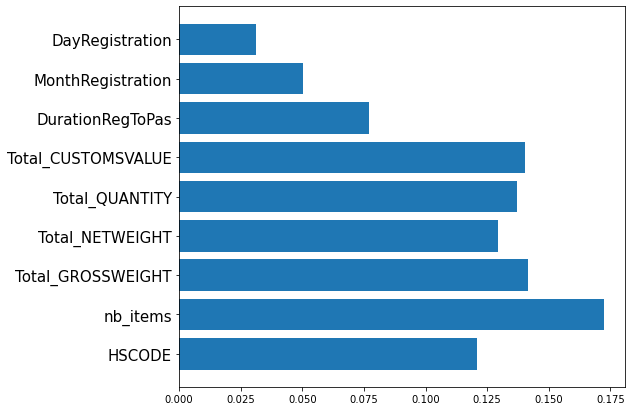

In [88]:
importance = RFmodel.feature_importances_
columns = range(len(importance))

plt.figure(figsize=(8,7))
plt.barh(columns,importance)
plt.yticks(columns,New_dataset3.columns[:-1],fontsize = 15)
plt.show()

### AdaBoost (scaled random oversampling)

In [89]:
AdbB_model = AdaBoostClassifier()
AdbB_model.fit(X_train_R_sc,y_train_R_sc)

pred_AdbB_R_sc = AdbB_model.predict(X_test_R_sc)
pd.crosstab(y_test_R_sc, pred_AdbB_R_sc)

col_0,0,1
Target,,
0,20193,5034
1,3832,24199


In [90]:
print(classification_report(y_test_R_sc, pred_AdbB_R_sc))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     25227
           1       0.83      0.86      0.85     28031

    accuracy                           0.83     53258
   macro avg       0.83      0.83      0.83     53258
weighted avg       0.83      0.83      0.83     53258



**We chose Random Forest to be our best model since it performance so far has be splendid.**

**We then perform Cross validation to get the accuracy of the model on average.** 

### Cross Validations for Random Forest

In [95]:
### Cross Validations for Random Forest

# Model Random Forest
RFmodel = RandomForestClassifier( n_estimators=150)

# Cross Validation Score (cv = 10)
scores = cross_val_score(estimator = RFmodel,X = X2, y = y2, cv = 3, n_jobs=-1)
print(scores)

# Average score
mean_score = round(np.mean(scores),2)
print('\n Average score is : {}%'.format(mean_score))

[0.9121724  0.91667771 0.89508967]

 Average score is : 0.91%
